In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from matplotlib.pylab import rcParams  
rcParams['font.family']='AppleGothic' #malgun Gothic  
rcParams['figure.figsize']=17, 8

import warnings
warnings.filterwarnings('ignore')


In [86]:
red= pd.read_csv('winequality-red.csv', sep=';')
red['type']=0
red.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [87]:
white=pd.read_csv('winequality-white.csv', sep=';', encoding = 'utf-8')
white['type']=1
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [88]:
print(red.shape)
print(white.shape)

(1599, 13)
(4898, 13)


In [89]:
#red랑 white를 합쳐주세요
#                                    인덱스 다시 세팅
wine=pd.concat([red, white], axis=0, ignore_index=True)
print(wine.shape)
wine.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [90]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [91]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [92]:
#Tuple 정렬하기: sorted(tuple, key) method
list(sorted(wine.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]

In [93]:
#각각의 품질등급마다 몇개의 와인이 있는지 count해주세요
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [94]:
# 9등급을 받은 5개의 와인을 찾아주기
wine[wine.quality==9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


# EDA

In [95]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [96]:
#칼럼의 이름의 형태 바꾸고 싶음
#EX) fixed acidity->fixed_acidity
wine.columns=wine.columns.str.replace(' ', '_')
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [97]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [98]:
#그룹별 분석? 와인종류에 따라서 품질이 얼마나 다를까?
wine.groupby(['type']).quality.describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [99]:
red_quality=wine.loc[wine.type==0,'quality']
white_quality=wine.loc[wine.type==1,'quality']

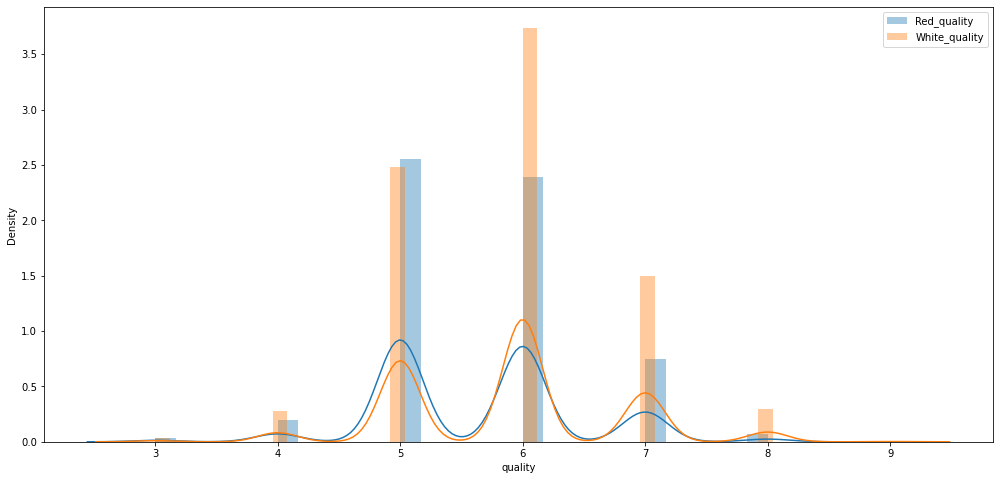

In [100]:
#생존자/비생존자의 distplot그리기
red_quality=wine[wine.type==0]
white_quality=wine[wine.type==1]

sns.distplot(red_quality.quality, label='Red_quality')
sns.distplot(white_quality.quality, label='White_quality')
plt.legend()

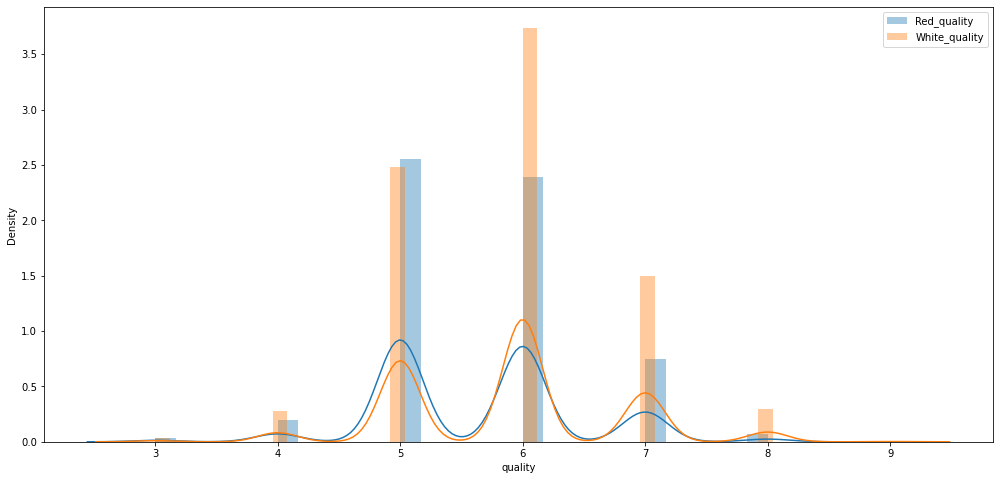

In [101]:
#생존자/비생존자의 distplot그리기
red_quality=wine.loc[wine.type==0]
white_quality=wine.loc[wine.type==1]

sns.distplot(red_quality.quality, label='Red_quality')
sns.distplot(white_quality.quality, label='White_quality')
plt.legend()

##### T검정
- 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기위해
- P-VALUE<0.05: 95%이상의 신뢰수준으로 두 그룹간 품질의 차이가 통계적으로 유의하다.
- 0.0000000 : 99.999999% 신뢰수준

In [102]:
!pip install statsmodels
import statsmodels.api as sm

In [103]:
#T검정 해주기
t, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [104]:
#코드는 맞는데 오류, 컴퓨터 문제 혹은 vscode문제
'T값은 %.3f 이고, p-value는 %.10f'%(t, pvalue)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
wine.corr

<bound method DataFrame.corr of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020

In [ ]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

##### 산점도 그래프

In [ ]:
#레드와인 300개 화이트와인 300개 랜덤 샘플링
def sampling(data, n=300):
    return data.loc[np.random.choice(data.index, replace=False, size=n)]

In [ ]:
red=wine[wine.type==0]
white=wine[wine.type==1]

red_sample=sampling(red)
print(red_sample.shape)
red_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1121,6.6,0.5,0.0,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6,0


In [ ]:
white_sample=sampling(white)
print(white_sample.shape)
white_sample.head(1)

(300, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
3801,7.1,0.26,0.19,8.2,0.051,53.0,187.0,0.996,3.16,0.52,9.7,5,1


In [ ]:
wine_sample=pd.concat([red_sample, white_sample], axis=0)
wine_sample.shape

(600, 13)

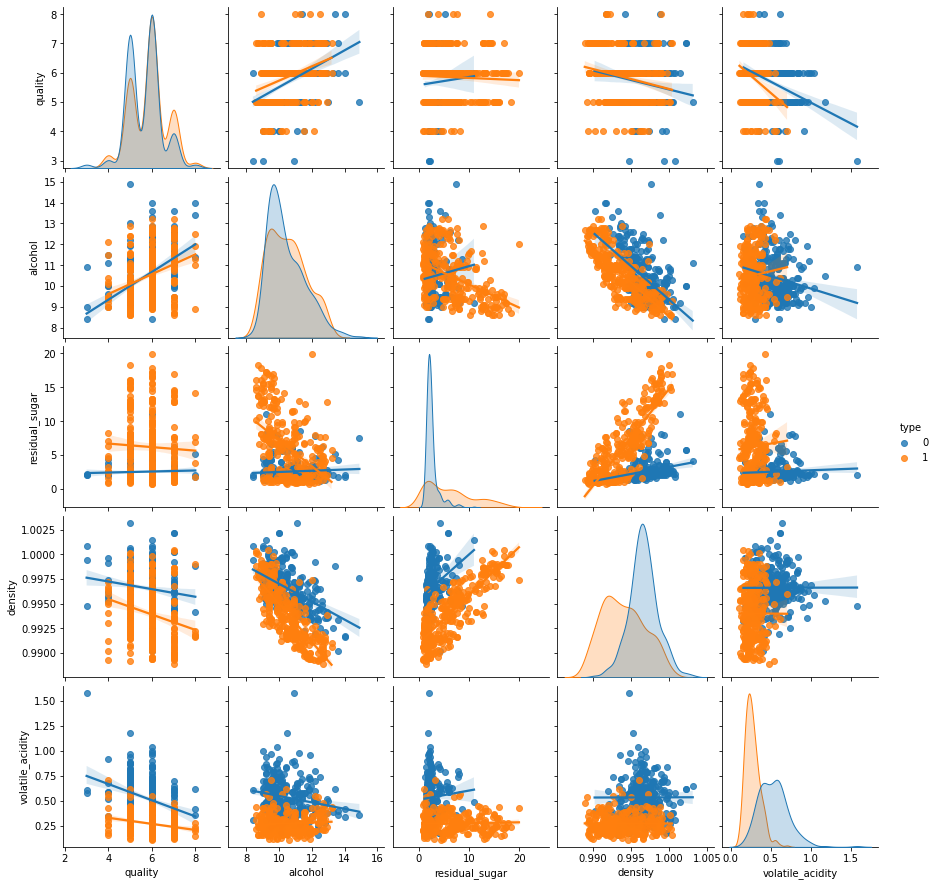

In [84]:
#pairplot
sns.pairplot(wine_sample, kind='reg', hue='type', vars=['quality', 'alcohol', 'residual_sugar', 'density', 'volatile_acidity'])